<a href="https://colab.research.google.com/github/kachytronico/colab-PIA/blob/main/Sesi%C3%B3n_del_Tema_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerías

In [ ]:
# carga de datos
import kagglehub

# aed
import pandas as pd
import seaborn as sns

# prepro
from sklearn.impute import SimpleImputer
import math

# 2.1 Carga de datos

In [ ]:
# Download latest version
path = kagglehub.dataset_download("tan5577/business-salesdataset2025")
df = pd.read_csv("/root/.cache/kagglehub/datasets/tan5577/business-salesdataset2025/versions/1/Business_sales_EDA.csv", sep=";")

Using Colab cache for faster access to the 'business-salesdataset2025' dataset.


In [ ]:
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,185102,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,188771,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,180176,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,112917,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,192936,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


# AED

In [ ]:
df.describe()

,Product ID,Sales Volume,price
count,20252.000000,20252.000000,20252.000000
mean,208931.432303,1097.400454,41.949061
std,8961.076507,298.234609,23.380960
min,110075.000000,518.000000,12.000000
25%,204442.750000,849.000000,23.950000
50%,209505.500000,990.000000,35.950000
75%,214568.250000,1364.250000,53.950000
max,219631.000000,1940.000000,134.990000


In [ ]:
df.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'name', 'description',
       'price', 'currency', 'terms', 'section', 'season', 'material',
       'origin'],
      dtype='object')

In [ ]:
df["Product ID"].value_counts()

,count
Product ID,
219631,1
185102,1
188771,1
180176,1
112917,1
...,...
129906,1
152174,1
132889,1


La columna `Product ID` queda propuesta para su eliminación por tratarse de un valor `primary key`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        20252 non-null  int64  
 1   Product Position  20252 non-null  object 
 2   Promotion         20252 non-null  object 
 3   Product Category  20252 non-null  object 
 4   Seasonal          20252 non-null  object 
 5   Sales Volume      20252 non-null  int64  
 6   brand             20252 non-null  object 
 7   url               20252 non-null  object 
 8   name              20251 non-null  object 
 9   description       20250 non-null  object 
 10  price             20252 non-null  float64
 11  currency          20252 non-null  object 
 12  terms             20252 non-null  object 
 13  section           20252 non-null  object 
 14  season            20252 non-null  object 
 15  material          20252 non-null  object 
 16  origin            20252 non-null  object

Dada la poca cantidad de valores nulos del problema, se propone el borrado de los mismos.

In [ ]:
df.corr(numeric_only=True)

,Product ID,Sales Volume,price
Product ID,1.000000,-0.01109,0.000899
Sales Volume,-0.011090,1.00000,-0.337780
price,0.000899,-0.33778,1.000000


# Preprocesamiento

## 2.2 Eliminación de columnas inútiles, valores sin sentidos y atípicos

In [ ]:
df = df.drop(columns = ["Product ID"])
df.head()

,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,name,description,price,currency,terms,section,season,material,origin
0,Aisle,Yes,clothing,Yes,1243,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,Aisle,Yes,clothing,No,1429,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,End-cap,Yes,clothing,Yes,1168,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,Aisle,Yes,clothing,No,1348,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,30.99,USD,jackets,MAN,Spring,Polyester,China
4,End-cap,Yes,clothing,Yes,1602,Zara,https://www.zara.com/us/en/double-faced-jacket...,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


Las columnas `url` y `description` son textos y todavía no hemos trabajado con `embeddings` (tema 6), así que las borro.

In [ ]:
df = df.drop(columns = ["url", "description"])
df.head()

,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,name,price,currency,terms,section,season,material,origin
0,Aisle,Yes,clothing,Yes,1243,Zara,BASIC PUFFER JACKET,78.99,USD,jackets,MAN,Winter,Polyester,Brazil
1,Aisle,Yes,clothing,No,1429,Zara,TUXEDO JACKET,14.99,USD,jackets,MAN,Autumn,Cotton,Turkey
2,End-cap,Yes,clothing,Yes,1168,Zara,SLIM FIT SUIT JACKET,71.95,USD,jackets,WOMAN,Autumn,Polyester,Morocco
3,Aisle,Yes,clothing,No,1348,Zara,STRETCH SUIT JACKET,30.99,USD,jackets,MAN,Spring,Polyester,China
4,End-cap,Yes,clothing,Yes,1602,Zara,DOUBLE FACED JACKET,22.99,USD,jackets,WOMAN,Winter,Wool Blend,China


## 2.2 Valores sin sentido

In [ ]:
df[df.price < 0]

,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,name,price,currency,terms,section,season,material,origin


In [ ]:
df[df["Sales Volume"] < 0]

,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,name,price,currency,terms,section,season,material,origin


No hay valores sin sentido en este conjunto de datos

<Axes: ylabel='Sales Volume'>

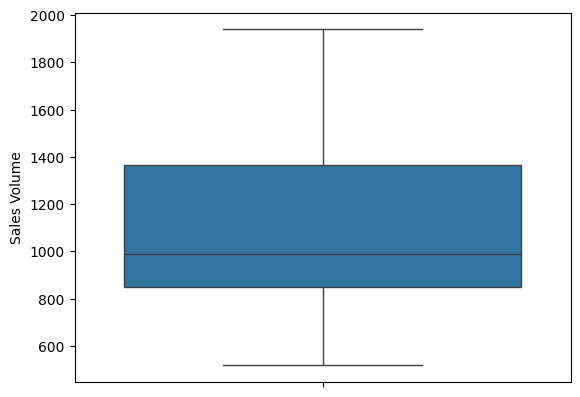

In [ ]:
sns.boxplot(df["Sales Volume"])

No tenemos valores atípicos.

## 2.3 Datos nulos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Position  20252 non-null  object 
 1   Promotion         20252 non-null  object 
 2   Product Category  20252 non-null  object 
 3   Seasonal          20252 non-null  object 
 4   Sales Volume      20252 non-null  int64  
 5   brand             20252 non-null  object 
 6   name              20251 non-null  object 
 7   price             20252 non-null  float64
 8   currency          20252 non-null  object 
 9   terms             20252 non-null  object 
 10  section           20252 non-null  object 
 11  season            20252 non-null  object 
 12  material          20252 non-null  object 
 13  origin            20252 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.2+ MB


Tal y como vimos en el AED el porcentaje de valores nulos es muy reducido por lo que queda justificada su eliminación.

_Por practicar, en vez de borrar el dato lo voy a imputar_.

In [ ]:
df.name.value_counts() # obtengo que la moda es "PLAID OVERSHIRT"

,count
name,
PLAID OVERSHIRT,8
BOMBER JACKET,5
POCKET OVERSHIRT,5
HOODED TECHNICAL JACKET,5
SUIT JACKET IN 100% LINEN,5
...,...
ZIPPERED WOOL BLEND OVERSHIRT STONE,1
HEART PRINT T-SHIRT SAND #5,1
PLEATED WOOL BLEND TEXTURED JACKET GREY,1


Reemplazo todos los valores nulos por la moda.

In [ ]:
# df["name"] = df["name"].fillna(df.name.mode())

In [ ]:
si = SimpleImputer(strategy = "most_frequent") # estimador
preds = si.fit_transform(df.name.values.reshape(-1, 1))
preds = [list(v) for v in preds] # lo convierto en [[valor]] para poder sustituir mis nulos
preds

[['BASIC PUFFER JACKET'],
 ['TUXEDO JACKET'],
 ['SLIM FIT SUIT JACKET'],
 ['STRETCH SUIT JACKET'],
 ['DOUBLE FACED JACKET'],
 ['CONTRASTING COLLAR JACKET'],
 ['FAUX LEATHER PUFFER JACKET'],
 ['SUIT JACKET IN 100% LINEN'],
 ['100% WOOL SUIT JACKET'],
 ['100% FEATHER FILL PUFFER JACKET'],
 ['HERRINGBONE TEXTURED JACKET'],
 ['OVERSIZED CROPPED JACKET LIMITED EDITION'],
 ['LEATHER BIKER JACKET'],
 ['CROPPED LEATHER JACKET'],
 ['FAUX LEATHER BOXY FIT JACKET'],
 ['FAUX LEATHER JACKET'],
 ['FAUX SUEDE BOMBER JACKET'],
 ['DENIM BOMBER JACKET'],
 ['BOUCLÉ TEXTURED JACKET'],
 ['SUIT JACKET IN 100% LINEN'],
 ['JACQUARD DENIM JACKET'],
 ['PADDED DENIM JACKET'],
 ['LEATHER JACKET'],
 ['LIGHTWEIGHT BOMBER JACKET'],
 ['SUIT JACKET'],
 ['FAUX LEATHER BOMBER JACKET'],
 ['PATCH BOMBER JACKET'],
 ['STRETCH POCKET OVERSHIRT'],
 ['RIB COLLAR JACKET'],
 ['FAUX LEATHER OVERSIZED JACKET LIMITED EDITION'],
 ['CONTRASTING PATCHES BOMBER JACKET'],
 ['PATCH BOMBER JACKET'],
 ['CROPPED BOMBER JACKET LIMITED EDITIO

In [ ]:
df["name"] = preds

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20252 entries, 0 to 20251
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product Position  20252 non-null  object 
 1   Promotion         20252 non-null  object 
 2   Product Category  20252 non-null  object 
 3   Seasonal          20252 non-null  object 
 4   Sales Volume      20252 non-null  int64  
 5   brand             20252 non-null  object 
 6   name              20252 non-null  object 
 7   price             20252 non-null  float64
 8   currency          20252 non-null  object 
 9   terms             20252 non-null  object 
 10  section           20252 non-null  object 
 11  season            20252 non-null  object 
 12  material          20252 non-null  object 
 13  origin            20252 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 2.2+ MB


# 2.4 Variabilidad

In [ ]:
df = df.drop(columns = ["Product Category", "brand", "currency"])

In [ ]:
"""
for column in df.columns:
    values = df[column].value_counts()
    print(f"Columna ({column}): {(values.iloc[0] - sum(values.iloc[1:])) * 100.0 / sum(values)}") # quédate con esta línea, código ÚTIL
"""

'\nfor column in df.columns:\n    values = df[column].value_counts()\n    print(f"Columna ({column}): {(values.iloc[0] - sum(values.iloc[1:])) * 100.0 / sum(values)}") # quédate con esta línea, código ÚTIL\n'

# 2.5 Variables categóricas

In [ ]:
def binary_categorizer(dataframe, column, code_map: dict = None, cols: int = None):
  # resultados
  result = []

  # puede ser que me obliguen a que haya un número determinado de columnas
  if not cols:
    cols = math.ceil(math.log2(len(dataframe[column].unique()))) # aplico la fórmula de log_2_n y lo aproximo al número más grande

  # puede ser que no se conozca el mapa y tenga que inferirlo
  if not code_map:
    code_map = {value: key for key, value in enumerate(dataframe[column].unique())} # creo el mapa de forma genérica si no existe

  # realizo la codificación a binario, comprobando que puedo hacerlo para todos los valores
  for value in dataframe[column]:
    code = code_map[value] # recojo el código asignado
    b_code = format(code, "b") # lo convierto a binario

    if len(b_code) > cols: # cols no puede ser más pequeño que el código
      raise Exception(f"El número de columnas ({cols}) es demasiado pequeño para empaquetar la información ({len(b_code)}). Modifica el valor del atributo cols.")

    # realizo la codificación
    b_code_a = b_code.rjust(cols, "0") # lo formateo hasta tamaño cols rellenando con 0
    _value = list(b_code_a) # lo convierto a lista: cada elemento en una posición diferente 00 -> ["0", "0"]
    result.append(list(map(lambda v: int(v), _value))) # convierto la lista en una lista de enteros ["0", "0"] -> [0, 0]

  # defino las nuevas columnas y las añado a mi df
  new_columns_name = [f"{column}_{i}" for i in range(len(list(result[0])))] # les daré nombre a las nuevas columnas
  result_df = pd.DataFrame(result, index=dataframe.index, columns=new_columns_name) # creo un nuevo df con los resultados
  dataframe = pd.concat([dataframe, result_df], axis=1) # lo añado en el eje X respetando el orden
  return dataframe.drop(columns=[column]), code_map # también devuelvo el mapa de códigos, me será útil

In [ ]:
df["Promotion"] = df["Promotion"].apply(lambda e: 1 if e else 0)
df["Seasonal"] = df["Seasonal"].apply(lambda e: 1 if e == "Yes" else 0)
df["section"] = df["section"].apply(lambda e: 1 if e == "Yes" else 0)

In [ ]:
df.head()

,Product Position,Promotion,Seasonal,Sales Volume,name,price,terms,section,season,material,origin
0,Aisle,1,1,1243,[BASIC PUFFER JACKET],78.99,jackets,0,Winter,Polyester,Brazil
1,Aisle,1,0,1429,[TUXEDO JACKET],14.99,jackets,0,Autumn,Cotton,Turkey
2,End-cap,1,1,1168,[SLIM FIT SUIT JACKET],71.95,jackets,0,Autumn,Polyester,Morocco
3,Aisle,1,0,1348,[STRETCH SUIT JACKET],30.99,jackets,0,Spring,Polyester,China
4,End-cap,1,1,1602,[DOUBLE FACED JACKET],22.99,jackets,0,Winter,Wool Blend,China


In [ ]:
df = df.drop(columns= "name")


In [ ]:
df.columns

Index(['Product Position', 'Promotion', 'Seasonal', 'Sales Volume', 'price',
       'terms', 'section', 'season', 'material', 'origin'],
      dtype='object')

In [ ]:
df, _ = binary_categorizer(df, "terms")
df, _ = binary_categorizer(df, "season")
df, _ = binary_categorizer(df, "material")
df, _ = binary_categorizer(df, "origin")

In [ ]:
# df[df["material"].str.equals("asdf")] = "Otros" <-- esto sirve para generar una columna "otros"

In [ ]:
df["Product Position"].value_counts() # <-- el orden importa

,count
Product Position,
Aisle,7810
End-cap,6791
Front of Store,5651


In [ ]:
df["Product Position"] = df["Product Position"].apply(lambda e: 1 if e == "Front of Store" else 2 if e == "End-cap" else 4)

In [ ]:
df.head()

,Product Position,Promotion,Seasonal,Sales Volume,price,section,terms_0,terms_1,terms_2,season_0,season_1,material_0,material_1,material_2,material_3,origin_0,origin_1,origin_2,origin_3
0,4,1,1,1243,78.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,1,0,1429,14.99,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,2,1,1,1168,71.95,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,4,1,0,1348,30.99,0,0,0,0,1,0,0,0,0,0,0,0,1,1
4,2,1,1,1602,22.99,0,0,0,0,0,0,0,0,1,0,0,0,1,1


# 2.6 Dimensionalidad

In [ ]:
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.decomposition import PCA # PCA = Principal Component Analysis

In [ ]:
x, y = df.drop(columns = "price"), df["price"]

Escalo los datos:

In [ ]:
ss = StandardScaler() # quizá SS no es el mejor nombre para una variable
ss = ss.fit(x) # primero lo entreno, pero me guardo el escalador para el testeo
x_std = ss.transform(x)
x_std

array([[ 1.19977291,  0.        ,  1.00098804, ..., -0.83248299,
        -1.1235158 , -1.12802555],
       [ 1.19977291,  0.        , -0.99901293, ..., -0.83248299,
        -1.1235158 ,  0.88650474],
       [-0.39169923,  0.        ,  1.00098804, ..., -0.83248299,
         0.89006314, -1.12802555],
       ...,
       [ 1.19977291,  0.        , -0.99901293, ..., -0.83248299,
         0.89006314,  0.88650474],
       [ 1.19977291,  0.        , -0.99901293, ..., -0.83248299,
        -1.1235158 , -1.12802555],
       [ 1.19977291,  0.        , -0.99901293, ..., -0.83248299,
        -1.1235158 ,  0.88650474]])

Reduzco la dimensionalidad.

In [ ]:
pca = PCA(n_components=0.90) # me quedo con tantas variables como sean necesarias para explicar el 90% del conjunto de datos
pca = pca.fit(x_std) # lo entreno
x_pca = pca.transform(x_std) # predigo mi resultado con el conjunto reducido
x_pca

array([[-0.34280077,  0.22813576,  0.41397334, ..., -1.58977152,
        -0.65821932, -0.80429966],
       [-0.97810444,  0.54714253, -1.3864069 , ..., -0.30855825,
        -1.02649172,  1.62935903],
       [ 0.5241057 , -0.19092453, -0.35583527, ..., -0.01319182,
        -0.51772228, -0.73652494],
       ...,
       [-0.35189257,  1.04050794,  0.90132359, ..., -1.20738611,
         0.31317122,  1.09161286],
       [-1.84448911,  0.02447109, -1.18062216, ..., -1.69143471,
        -0.73550587, -0.34335598],
       [-0.9923559 , -1.03825536,  0.22423074, ...,  1.41836396,
         0.25150788,  0.66951264]])

In [ ]:
x_pca.shape

(20252, 14)

# Opcional

In [ ]:
model = Model()
model = model.fit(x_pca, y)
preds = model.predict(y)